<a href="https://colab.research.google.com/github/TriggerRao/ML_datasets/blob/main/Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = (
boston_housing.load_data())

In [11]:
#normalizes the data, remember that the std and mean calculated is for the train_data but is used even for
#test_data, by this it can be seen that the parameters of test_data shouldn't be used anywhere in the model
#not even for things as simple as normalization
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [12]:
import keras
from keras import layers
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1)
  ])
  model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])     #mse loss function stands for mean squared error and is widely used for linear regression models
  return model                                 #mae stands for mean absolute error, absolute vale of the difference between prediction and the actual value

In [13]:
import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
  print(f"Processing fold #{i}")
  #validation data containing a 4th of the train_data
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  #partial data consisting of a 3/4th of the train_data and used for training
  partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
    train_data[(i + 1) * num_val_samples:]],
    axis=0)
  partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
    train_targets[(i + 1) * num_val_samples:]],
    axis=0)
  model = build_model()
  model.fit(partial_train_data, partial_train_targets,
    epochs=num_epochs, batch_size=16, verbose=0)        #trains the model in silent mode, verbose = 0
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [14]:
np.mean(all_scores)   #mean turns out to be quite high, error is high, try more epochs

2.297610491514206

In [15]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
  print(f"Processing fold #{i}")
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
    train_data[(i + 1) * num_val_samples:]],
    axis=0)
  partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
    train_targets[(i + 1) * num_val_samples:]],
    axis=0)
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets,
    validation_data=(val_data, val_targets),
    epochs=num_epochs, batch_size=16, verbose=0)
  mae_history = history.history["val_mae"]
  all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [16]:
average_mae_history = [
  np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

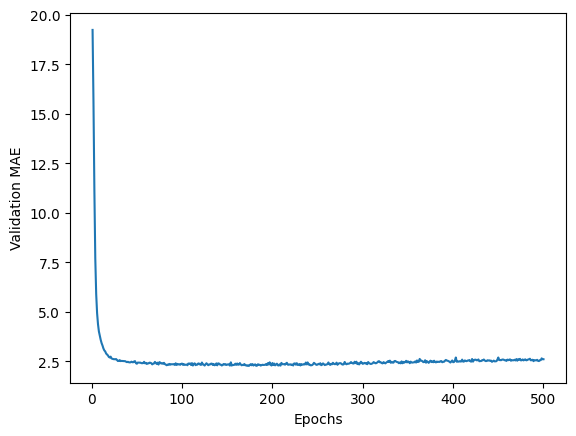

In [20]:
# import matplotlib.pyplot as plt
# plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
# plt.xlabel("Epochs")
# plt.ylabel("Validation MAE")
# plt.show()

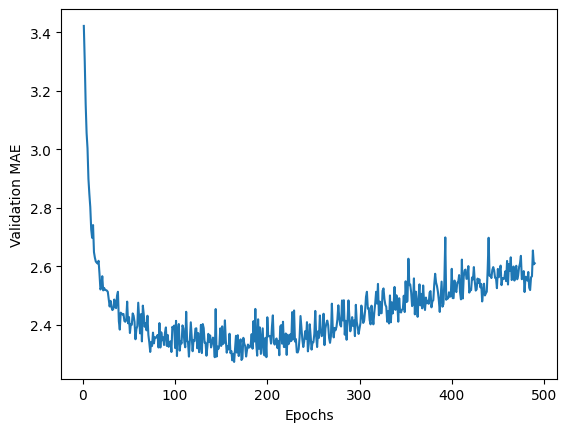

In [22]:
# truncated_mae_history = average_mae_history[10:]
# plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
# plt.xlabel("Epochs")
# plt.ylabel("Validation MAE")
# plt.show()   # after excluding scaling issues

In [23]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
#as the model behaves the best at 120-140 epochs and starts overfitting later
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 14.1727 - mae: 2.4681
